# Import and Cleaning

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import PolynomialFeatures
from gplearn.genetic import SymbolicRegressor

df = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape')
df = df.drop(['Date', 'Functioning Day'], axis=1)
df['Holiday'].replace({'No Holiday':1, 'Holiday':1}, inplace=True)
df['Seasons'].replace({'Winter':1, 'Spring':2, 'Summer':3, 'Autumn':4}, inplace=True)
df["Hour"]= df['Hour'].add(1)
df["Solar Radiation (MJ/m2)"] = df["Solar Radiation (MJ/m2)"].add(1)
df["Rainfall(mm)"] = df["Rainfall(mm)"].add(1)
df["Snowfall (cm)"] = df["Snowfall (cm)"].add(1)
#df = df.sample(frac=1, random_state=3).reset_index(drop=True)   #Shuffling Data Instances as data is chronological

y = df['Rented Bike Count']
X = df.drop(['Rented Bike Count'],axis=1)
y_test = y[:-5000]
y_train = y[-5000:]

def output(model, xtrain, xtest):
    print(f"Adjusted R^2: {1-(1-model.score(xtrain,y_train)) * (len(y_train)-1)/(len(y_train)-xtrain.shape[1]-1)}")
    print(f"R^2 cross val: {model.score(xtest,y_test)}")
    print('\n')

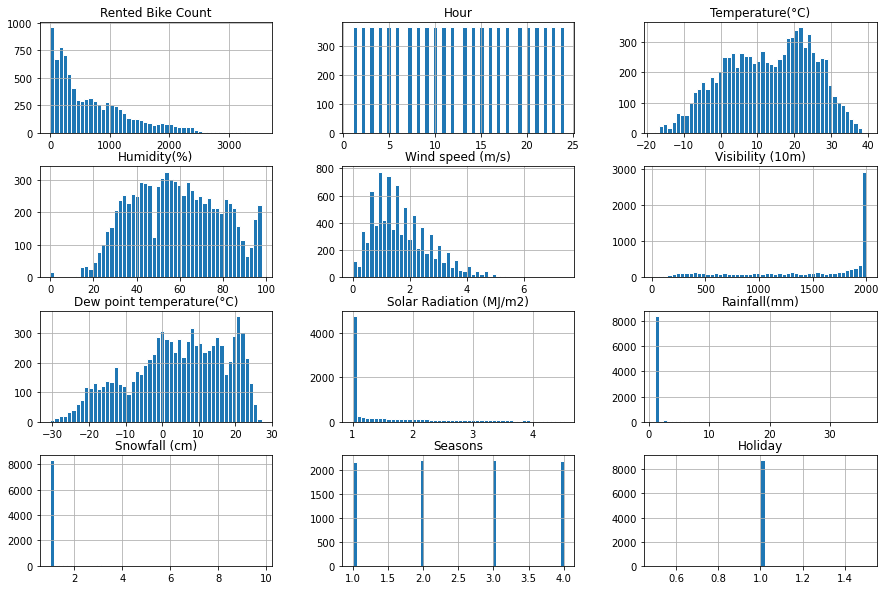

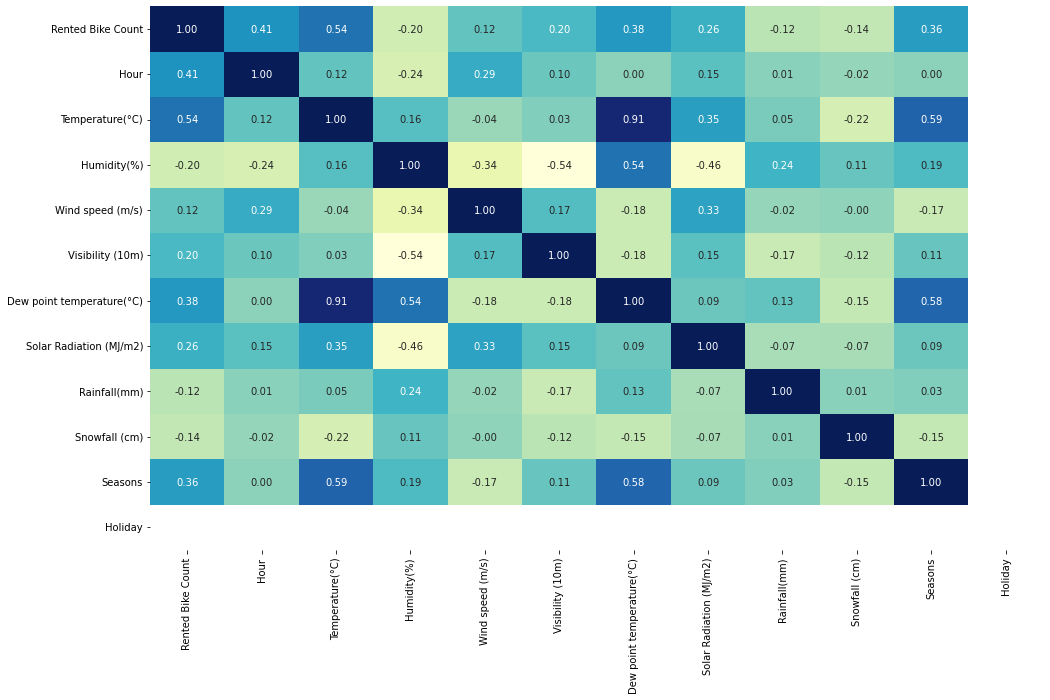

Summary Stats


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.0
mean,704.602055,12.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,1.569111,1.148687,1.075068,2.504110,1.0
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.114408,0.0
min,0.000000,1.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,1.000000,1.000000,1.000000,1.000000,1.0
25%,191.000000,6.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,1.000000,1.000000,1.000000,2.000000,1.0
50%,504.500000,12.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,1.010000,1.000000,1.000000,3.000000,1.0
75%,1065.250000,18.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,1.930000,1.000000,1.000000,3.000000,1.0
max,3556.000000,24.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,4.520000,36.000000,9.800000,4.000000,1.0


In [6]:
df.hist(bins=50, figsize=(15,10), ec='w')
plt.show()

plt.figure(figsize =(16,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt=".2f",cbar=False)
plt.show()

print("Summary Stats")
df.describe()


# Feature Selection

In [7]:
reg = LinearRegression() 

#Forward
sfs = SequentialFeatureSelector(estimator=reg).fit(X,y)
forward = sfs.transform(X)
print(sfs.get_support())
forward_test = forward[:-5000]                 
forward_train = forward[-5000:]

#Backward
sfs = SequentialFeatureSelector(estimator=reg, direction="backward").fit(X,y)
backward = sfs.transform(X)
backward_test = backward[:-5000]                
backward_train = backward[-5000:]

#Recursive
sfs = RFE(estimator=reg, step=1).fit(X,y)
recur = sfs.transform(X)
recur_test = recur[:-5000]                 
recur_train = recur[-5000:]

[False  True False False  True False False  True  True False  True]


# Forward Models

In [8]:
print("Linear Regression Forward Model")
model = LinearRegression().fit(forward_train,y_train)
output(model,forward_train,forward_test)

print("Ridge Forward Model")
model = RidgeCV().fit(forward_train,y_train)
output(model,forward_train,forward_test)

print("Lasso Forward Model")
model = LassoCV().fit(forward_train,y_train)
output(model,forward_train,forward_test)

print("Quadratirc Forward Model")
quad = PolynomialFeatures(degree=2)
train = quad.fit_transform(forward_train)
test = quad.fit_transform(forward_test)
model = LinearRegression().fit(train,y_train)
output(model, train, test)

print("Symbolic Regression Forward Model")
model = SymbolicRegressor(random_state=2).fit(forward_train,y_train)
output(model,forward_train,forward_test)

Linear Regression Forward Model
Adjusted R^2: 0.1390875016330183
R^2 cross val: 0.27425559829990886


Ridge Forward Model
Adjusted R^2: 0.13908745953079116
R^2 cross val: 0.27422106540195423


Lasso Forward Model
Adjusted R^2: 0.11750156630590891
R^2 cross val: -0.03545960545338467


Quadratirc Forward Model
Adjusted R^2: 0.15721671939088955
R^2 cross val: 0.27396825896487986


Symbolic Regression Forward Model
Adjusted R^2: 0.13426232073039168
R^2 cross val: -1.2185145146749745




# Backward Models

In [9]:
print("Linear Regression Backward Model")
model = LinearRegression().fit(backward_train,y_train)
output(model,backward_train, backward_test)

print("Ridge Backward Model")
model = RidgeCV().fit(backward_train,y_train)
output(model,backward_train, backward_test)

print("Lasso Backward Model")
model = LassoCV().fit(backward_train,y_train)
output(model,backward_train, backward_test)

print("Quadratirc Backward Model")
quad = PolynomialFeatures(degree=2)
train = quad.fit_transform(backward_train)
test = quad.fit_transform(backward_test)
model = LinearRegression().fit(train,y_train)
output(model,train,test)

print("Symbolic Regression Backward Model")
model = SymbolicRegressor(random_state=2).fit(backward_train, y_train)
output(model,backward_train, backward_test)

Linear Regression Backward Model
Adjusted R^2: 0.1390875016330183
R^2 cross val: 0.27425559829990886


Ridge Backward Model
Adjusted R^2: 0.13908745953079116
R^2 cross val: 0.27422106540195423


Lasso Backward Model
Adjusted R^2: 0.11750156630590891
R^2 cross val: -0.03545960545338467


Quadratirc Backward Model
Adjusted R^2: 0.15721671939088955
R^2 cross val: 0.27396825896487986


Symbolic Regression Backward Model
Adjusted R^2: 0.13426232073039168
R^2 cross val: -1.2185145146749745




# Recursive Models

In [10]:
print("Linear Regression Recursive Model")
model = LinearRegression().fit(recur_train,y_train)
output(model,recur_train, recur_test)

print("Ridge Recursive Model")
model = RidgeCV().fit(recur_train,y_train)
output(model,recur_train, recur_test)

print("Lasso Recursive Model")
model = LassoCV().fit(recur_train,y_train)
output(model,recur_train, recur_test)

print("Quadratirc Recursive Model")
quad = PolynomialFeatures(degree=2)
train = quad.fit_transform(recur_train)
test = quad.fit_transform(recur_test)
model = LinearRegression().fit(train,y_train)
output(model,train,test)

print("Symbolic Regression Recursive Model")
model = SymbolicRegressor(random_state=2).fit(recur_train,y_train)
output(model,recur_train, recur_test)

Linear Regression Recursive Model
Adjusted R^2: 0.33135497216476695
R^2 cross val: -3.94166946979729


Ridge Recursive Model
Adjusted R^2: 0.33135354530126615
R^2 cross val: -3.934948892631893


Lasso Recursive Model
Adjusted R^2: 0.33119277619082765
R^2 cross val: -3.866591738906033


Quadratirc Recursive Model
Adjusted R^2: 0.3830393359045099
R^2 cross val: -1.6636811677817502


Symbolic Regression Recursive Model
Adjusted R^2: 0.27581151318135744
R^2 cross val: -3.154871493477411


